# CME538 Big Project - Data Hustlers

In [1]:
# Import 3rd party libraries
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pylab as plt
import seaborn as sns

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [1]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium

## Import Weather Data

In [4]:
weather_files = os.listdir()
weather_filenames = [file for file in weather_files if 'P1D' in file]

# Print file names
print(weather_filenames[0:5])

['en_climate_daily_ON_6158355_2019_P1D.csv', 'en_climate_daily_ON_6158355_2020_P1D.csv', 'en_climate_daily_ON_6158355_2021_P1D.csv', 'en_climate_daily_ON_6158355_2023_P1D.csv', 'en_climate_daily_ON_6158355_2022_P1D.csv']


In [5]:
weather_data = []

for file in weather_filenames:
    data = pd.read_csv(file)
    weather_data.append(data)
    
weather_data = pd.concat(weather_data)

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2019-01-01,2019,1,1,NaN,6.3,...,NaN,NaN,0.4,NaN,0.0,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2019-01-02,2019,1,2,NaN,0.6,...,NaN,NaN,2.9,NaN,0.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2019-01-03,2019,1,3,NaN,1.5,...,NaN,NaN,0.0,NaN,5.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2019-01-04,2019,1,4,NaN,7.8,...,NaN,NaN,0.0,NaN,4.0,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2019-01-05,2019,1,5,NaN,3.9,...,NaN,NaN,0.0,NaN,1.0,NaN,NaN,M,NaN,M


In [6]:
# Converting to Date/Time Index
weather_data['Date/Time'] = pd.to_datetime(weather_data['Date/Time'])
weather_data.set_index(pd.DatetimeIndex(weather_data['Date/Time']), inplace=True)

weather_data.drop(columns=['Date/Time'], inplace=True)

weather_data.index = weather_data.index.tz_localize('EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2019,1,1,NaN,6.3,NaN,...,NaN,NaN,0.4,NaN,0.0,NaN,NaN,M,NaN,M
2019-01-02 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2019,1,2,NaN,0.6,NaN,...,NaN,NaN,2.9,NaN,0.0,NaN,NaN,M,NaN,M
2019-01-03 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2019,1,3,NaN,1.5,NaN,...,NaN,NaN,0.0,NaN,5.0,NaN,NaN,M,NaN,M
2019-01-04 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2019,1,4,NaN,7.8,NaN,...,NaN,NaN,0.0,NaN,4.0,NaN,NaN,M,NaN,M
2019-01-05 00:00:00-05:00,-79.4,43.67,TORONTO CITY,6158355,2019,1,5,NaN,3.9,NaN,...,NaN,NaN,0.0,NaN,1.0,NaN,NaN,M,NaN,M


## Data Cleaning

In [7]:
#Display Column Names
print(weather_data.columns)

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag',
       'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag',
       'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)',
       'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag',
       'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)',
       'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag',
       'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag',
       'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'],
      dtype='object')


In [8]:
# Remove the Flag columns, as they are not relevant for our analysis.
weather_data = weather_data.drop(['Min Temp Flag', 'Max Temp Flag', 'Mean Temp Flag', 'Heat Deg Days Flag', 'Cool Deg Days Flag', 'Total Rain Flag', 'Total Snow Flag', 'Total Precip Flag', 'Snow on Grnd Flag', 'Dir of Max Gust Flag', 'Spd of Max Gust Flag'], axis=1)

In [9]:
# Verify that columns were removed
print(weather_data.columns)

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Year',
       'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'Dir of Max Gust (10s deg)',
       'Spd of Max Gust (km/h)'],
      dtype='object')


In [10]:
# Check for missing values.
missing_weather = weather_data.isnull().sum()

weather_data_missing = pd.DataFrame(missing_weather, columns=['count'])
weather_data_missing.index.name = 'Column Name'

# View DataFrame
weather_data_missing

,count
Column Name,
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Data Quality,1826
Max Temp (°C),12


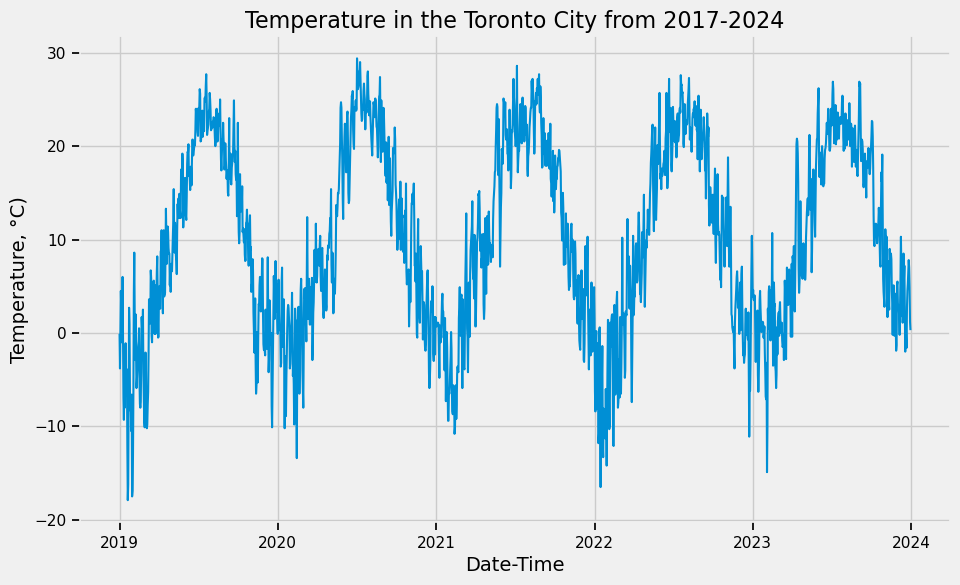

In [11]:
# Plotting Weather Data to Explore Trends
plt.figure(figsize=(10, 6))

sns.lineplot(data=weather_data, x=weather_data.index, y='Mean Temp (°C)')

plt.title('Temperature in the Toronto City from 2017-2024', fontsize=16)
plt.xlabel('Date-Time', fontsize=14)
plt.ylabel('Temperature, °C)', fontsize=14)

# Show the plot
plt.show()

In [12]:
# Add a 'season' column for seasonality analysis
def assign_season(row):
    if row['Month'] in [12, 1, 2]:
        return 'Winter'
    elif row['Month'] in [3, 4, 5]:
        return 'Spring'
    elif row['Month'] in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

weather_data['Season'] = weather_data.apply(assign_season, axis=1)

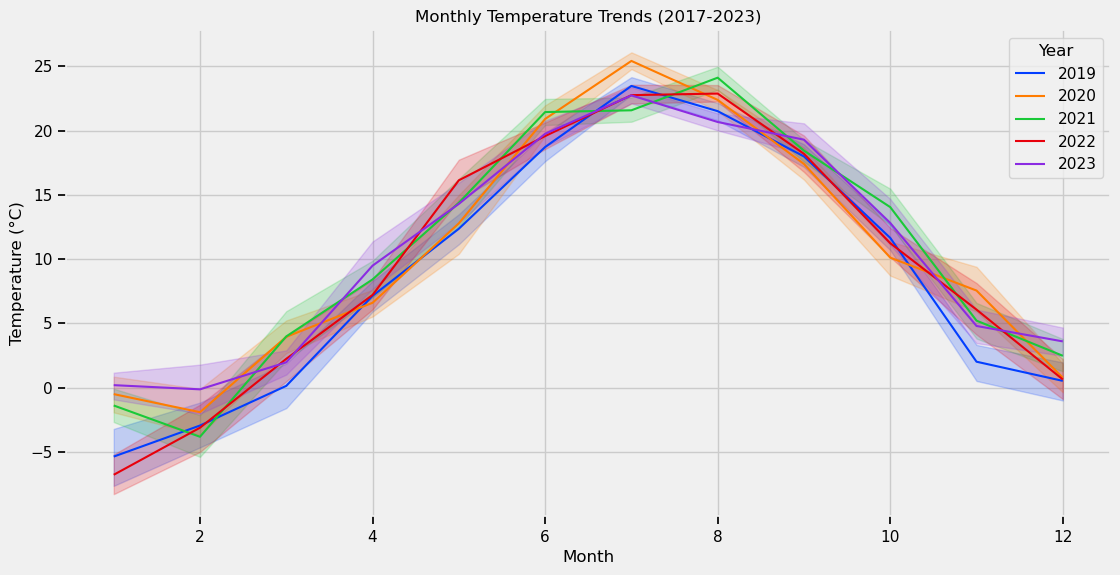

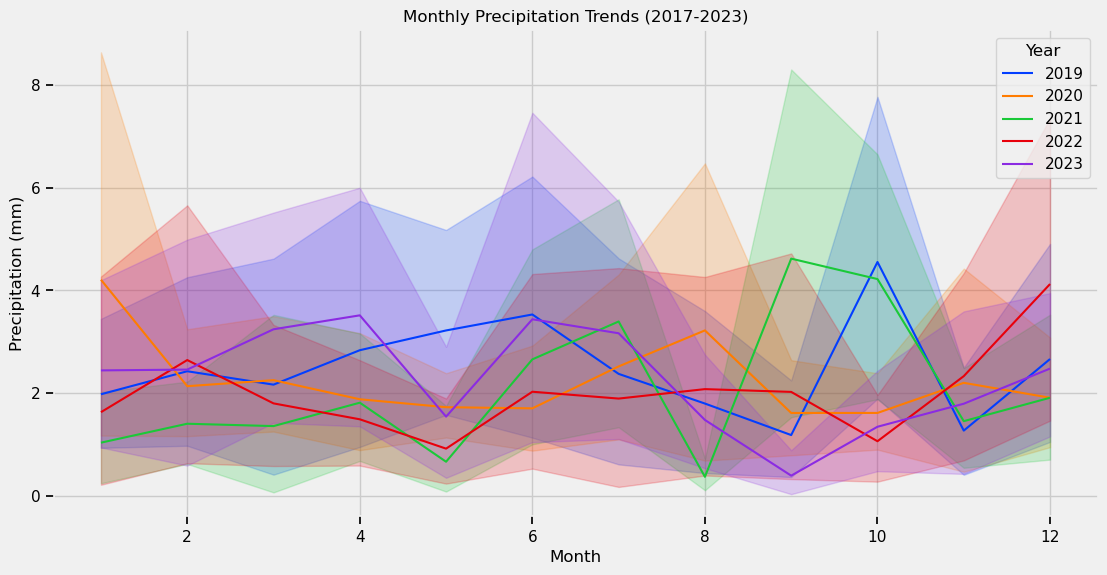

In [13]:
# 1. Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x='Month', y='Mean Temp (°C)', hue='Year', palette='bright')
plt.title('Monthly Temperature Trends (2017-2023)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_data, x='Month', y='Total Precip (mm)', hue='Year', palette='bright')
plt.title('Monthly Precipitation Trends (2017-2023)')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Month')
plt.legend(title='Year')
plt.show()

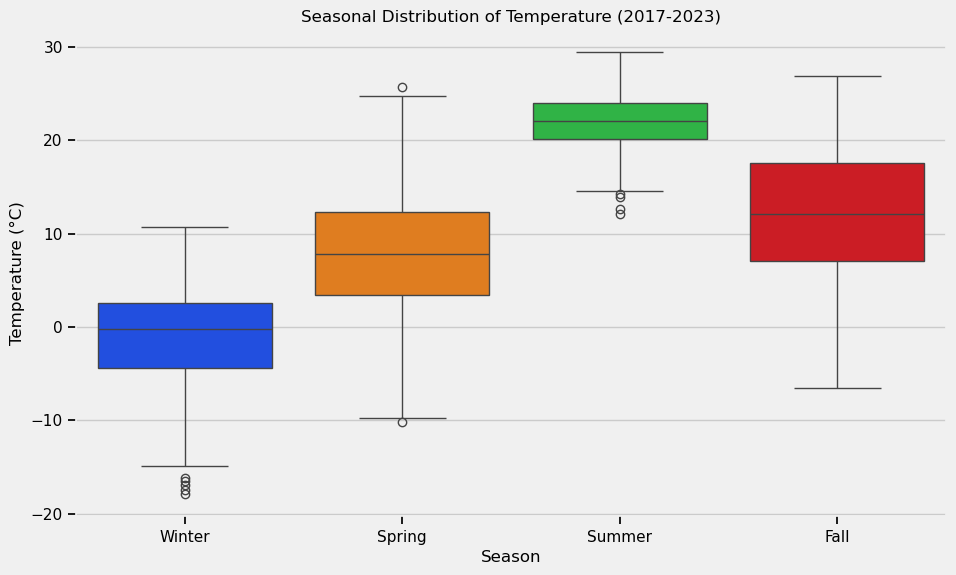

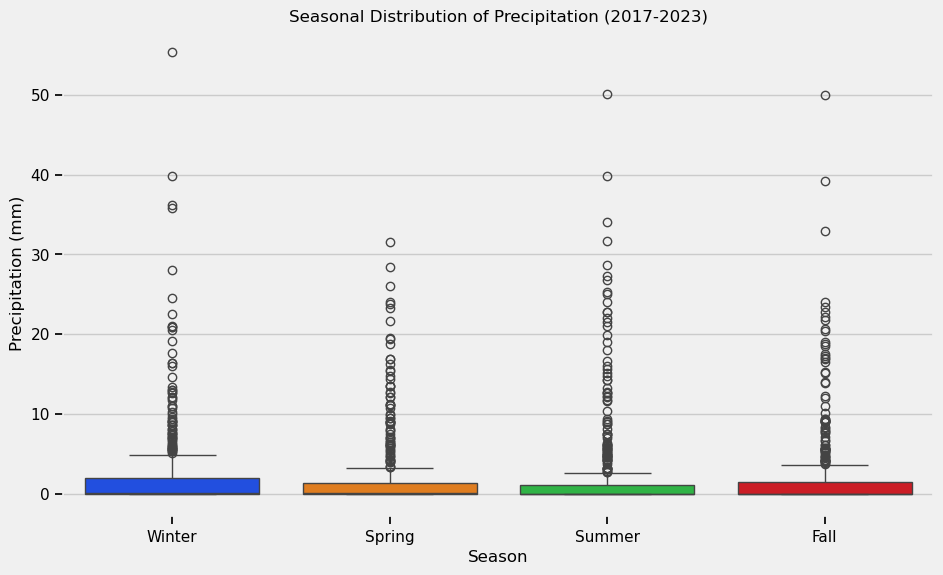

In [14]:
# 2. Seasonal Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x='Season', y='Mean Temp (°C)', palette='bright')
plt.title('Seasonal Distribution of Temperature (2017-2023)')
plt.ylabel('Temperature (°C)')
plt.xlabel('Season')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=weather_data, x='Season', y='Total Precip (mm)', palette='bright')
plt.title('Seasonal Distribution of Precipitation (2017-2023)')
plt.ylabel('Precipitation (mm)')
plt.xlabel('Season')
plt.show()

In [17]:
# Save the merged DataFrame as csv
weather_data.to_csv('weather_dataframe.csv', index=False)